In [50]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


dataset link=[ https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction ]

In [22]:
dataset= pd.read_csv("/home/deepansh/TDS-AVENUE-CODEFORGE/churn_dataset/Churn_Modelling.csv")

In [23]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
dataset.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [28]:
dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [29]:
dataset= pd.get_dummies(dataset, columns=["Geography", "Gender"], drop_first=True)

In [30]:
not_Exited = dataset[dataset["Exited"] == 0]
Exited = dataset[dataset["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [31]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

df_new = pd.concat([not_Exited , Exited])

Splitting dataset

In [32]:
##-----------independent variables-------
x=dataset.drop(columns="Exited", axis=1)
y=dataset["Exited"]

In [38]:
columns = df_new.columns.tolist() 
columns.remove('Exited')

scaler= StandardScaler()
x[columns] = scaler.fit_transform(x[columns])
df_new[x.columns] = x
df_new


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.460730,-0.183251,1.032908,1.253748,0.807737,0.646092,-1.030670,-0.191124,0,-0.578736,1.742740,0.912419
6409,0.335972,-0.564665,1.378686,-1.225848,0.807737,0.646092,0.970243,-1.066047,0,-0.578736,-0.573809,-1.095988
2157,0.967126,0.484225,-0.695982,-1.225848,0.807737,0.646092,0.970243,1.546333,0,-0.578736,-0.573809,-1.095988
1618,0.480827,-1.136786,1.032908,1.037560,0.807737,0.646092,-1.030670,-0.165180,0,-0.578736,-0.573809,0.912419
1633,-0.915988,-0.373958,0.687130,-1.225848,-0.911583,-1.547768,-1.030670,-0.890675,0,-0.578736,-0.573809,0.912419
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.578181,0.293517,-0.695982,1.210909,-0.911583,0.646092,0.970243,-0.811111,1,1.727904,-0.573809,0.912419
9982,0.046263,0.674932,0.687130,0.972192,-0.911583,0.646092,-1.030670,0.261812,1,1.727904,-0.573809,-1.095988
9991,-0.553850,1.342407,-0.350204,0.190648,-0.911583,0.646092,-1.030670,-0.533938,1,-0.578736,-0.573809,-1.095988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1,-0.578736,-0.573809,-1.095988


In [39]:
X_train,  x_test,y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=49)

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=18),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [42]:
def evaluate_model(model, X_train, y_train, x_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

Logistic Regression

In [44]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, x_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.801667   0.625616  0.196594  0.299176
Random Forest        0.860000   0.817416  0.450464  0.580838
Gradient Boosting    0.861333   0.817680  0.458204  0.587302


In [45]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [48]:

y_pred = Gradient_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2288   66]
 [ 350  296]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2354
           1       0.82      0.46      0.59       646

    accuracy                           0.86      3000
   macro avg       0.84      0.72      0.75      3000
weighted avg       0.86      0.86      0.85      3000



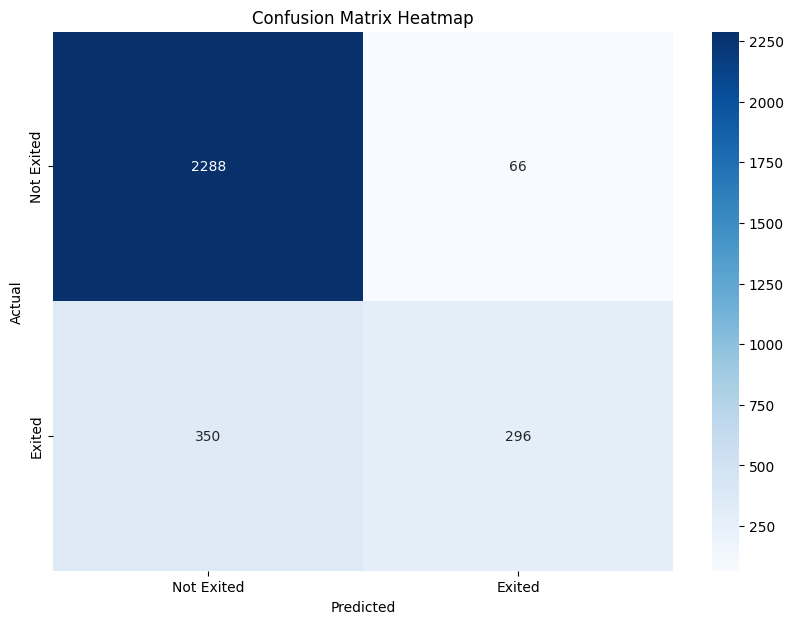

In [51]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()